## Importação dos Dados

In [87]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("camnugent/california-housing-prices")
os.listdir(path)


['housing.csv']

In [88]:
df = pd.read_csv(f"{path}/housing.csv")

## EDA

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [89]:
df.shape

(20640, 10)

In [90]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [91]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [92]:
# Tipos das variáveis
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [93]:
# Quantidade de valores faltantes por colunas
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## One-hot Encoding na Variável "ocean_proximity"

In [94]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [95]:
df = pd.get_dummies(df, dtype=int)

In [96]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


## Análise da Distribuição das Variáveis

<Axes: >

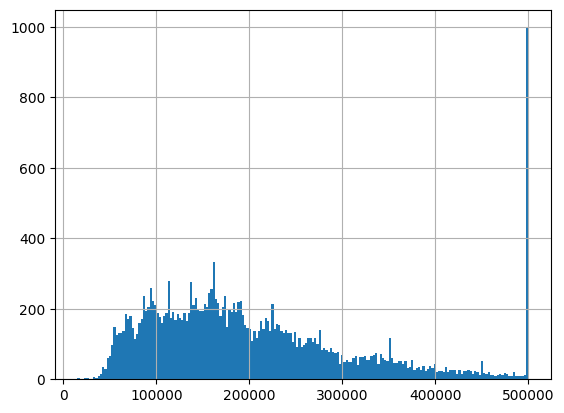

In [97]:
df["median_house_value"].hist(bins=200)

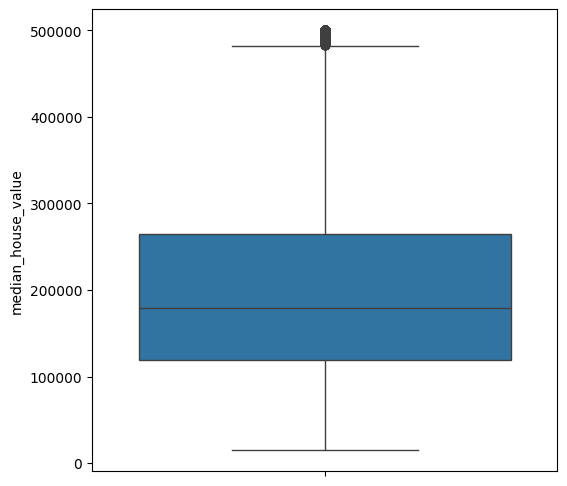

In [98]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['median_house_value'])
plt.show()

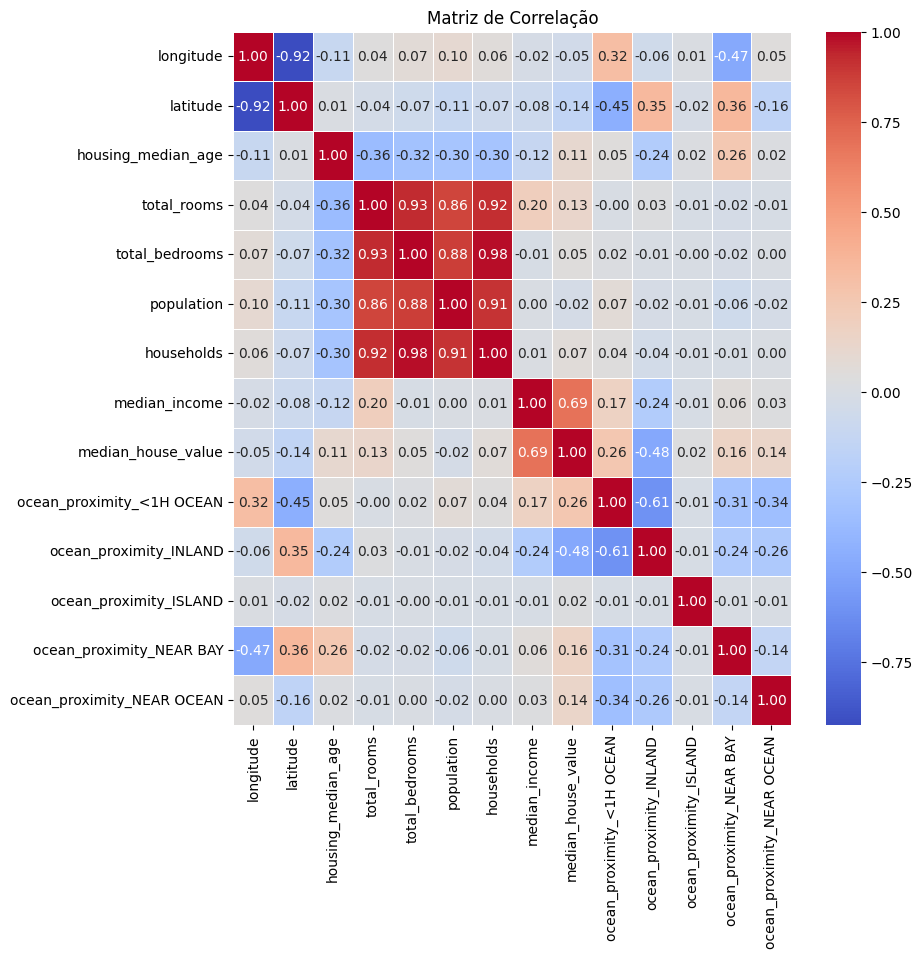

In [99]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(9, 9))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Matriz de Correlação")
plt.show()

## Split

In [100]:
y = df['median_house_value']
X = df.drop(columns='median_house_value')

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Tratamento de Dados Ausentes

In [102]:
# Valor percentual dos dados ausentes da coluna 'total_bedrooms'
df['total_bedrooms'].isnull().mean() * 100

np.float64(1.002906976744186)

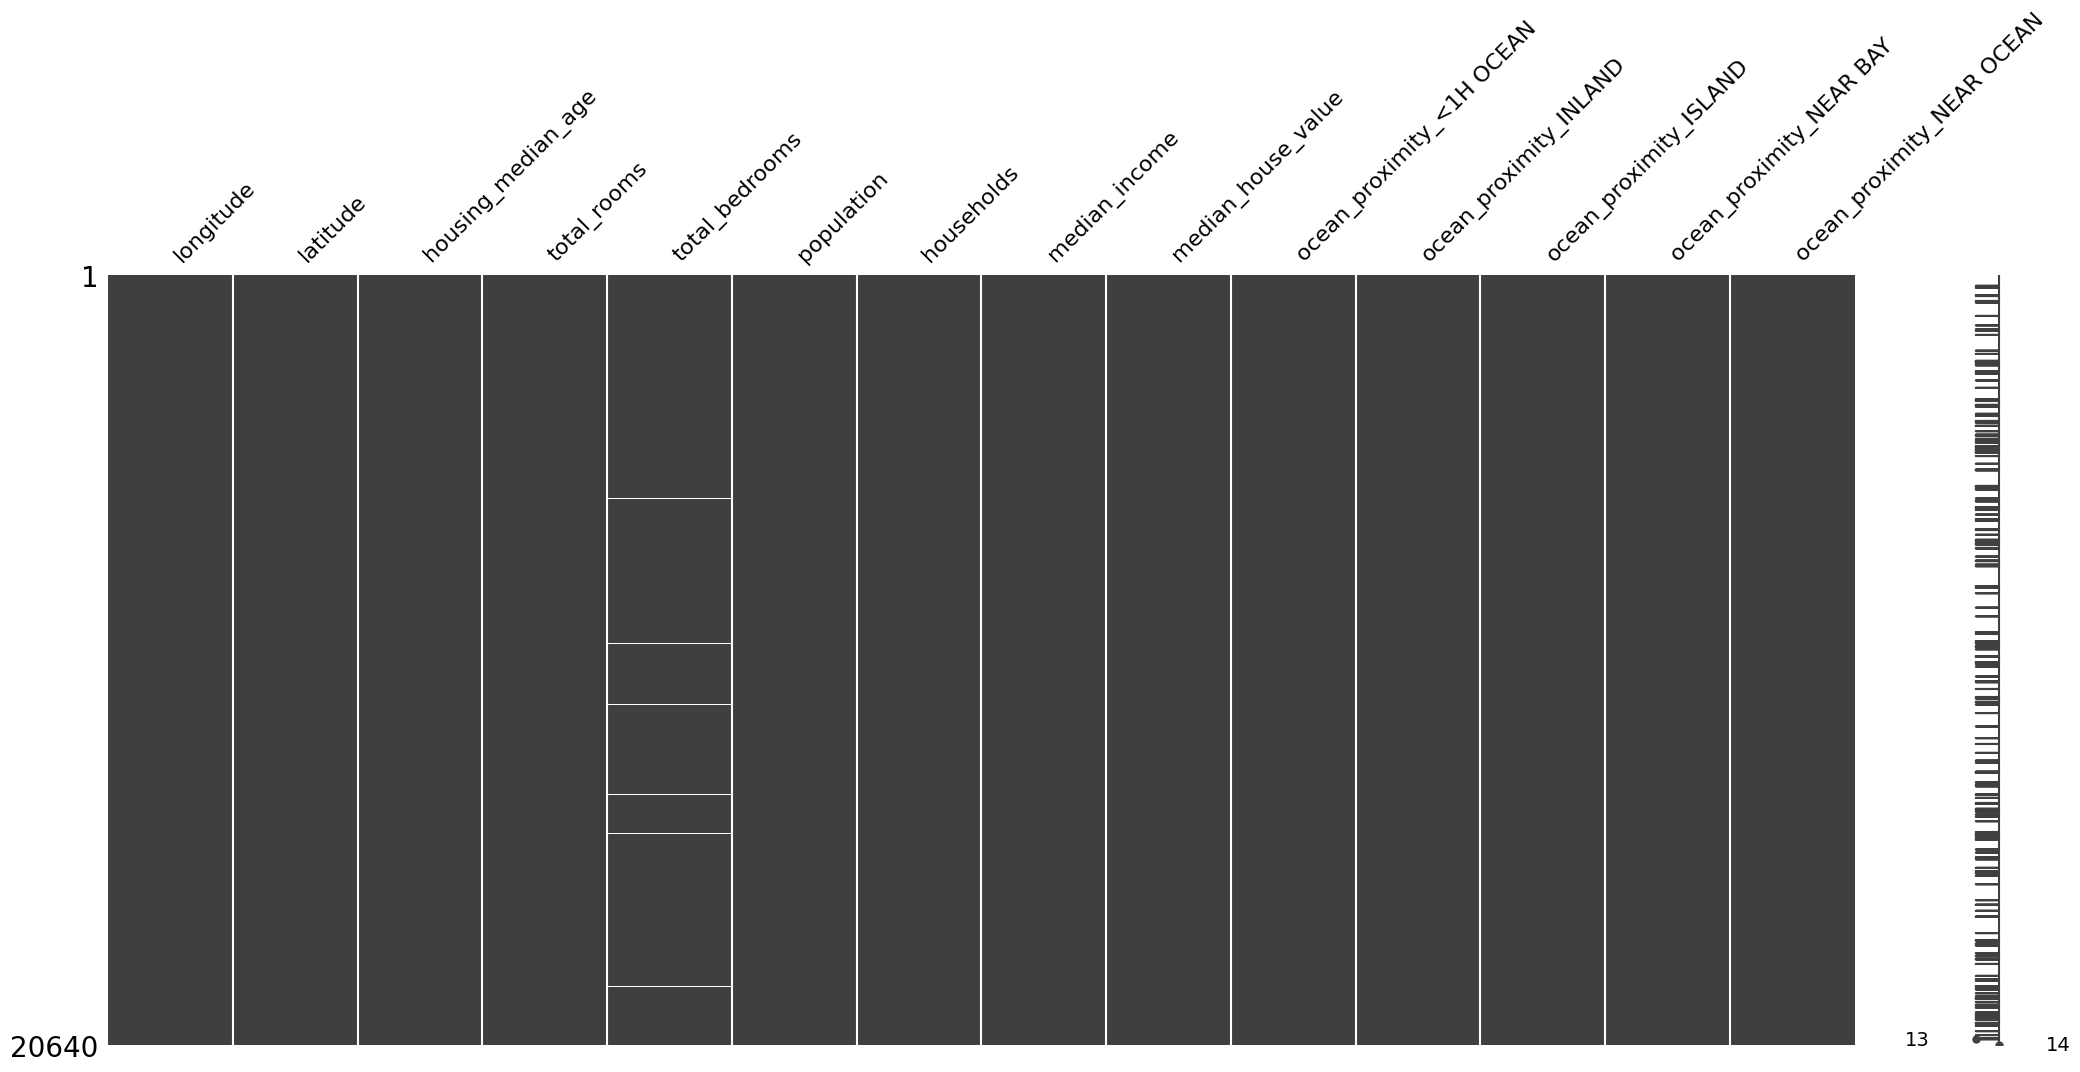

In [103]:
import missingno as msno

# Posições em que se encontram os dados ausentes, a fim de tentar encontrar algum padrão
ax = msno.matrix(df)

In [104]:
from sklearn.impute import SimpleImputer

# Imputando os dados faltantes apenas na coluna 'total_bedrooms'
im = SimpleImputer(strategy='mean')
X_train['total_bedrooms'] = im.fit_transform(X_train[['total_bedrooms']]) # Tirando a média pela amostra de treino
X_test['total_bedrooms'] = im.transform(X_test[['total_bedrooms']])

## Normalização dos Dados

In [105]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,1,0,0,0,0
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,0,0,0,0,1
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,0,0,0,0,1
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,0,1,0,0,0
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1,0,0,0,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,0,1,0,0,0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1,0,0,0,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1,0,0,0,0


In [106]:
from sklearn import preprocessing

cols = "longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income".split(",")
scaler = preprocessing.StandardScaler()

X_train[cols] = scaler.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train[cols], columns=cols)

X_test[cols] = scaler.transform(X_test[cols])
X_test[cols] = pd.DataFrame(X_test[cols])

# remoção de variáveis correlacionadas